# **df3 - Feature Reduction - Model Training**

# **Fraudulent Claims Dataset**

In [ ]:
####################################################################################

In [ ]:
import pandas as pd

In [ ]:
df3=pd.read_csv('/content/df3_feature.csv')

In [ ]:
df3.head()

Unnamed: 0.1  Unnamed: 0                              Claim_ID  Claim_Date  \
0             0           0  bdd640fb-0667-4ad1-9c80-317fa3b1799d  2021-07-19   
1             1           1  8b9d2434-e465-4150-bd9c-66b3ad3c2d6d  2020-08-09   
2             2           2  9a1de644-815e-46d1-bb8f-aa1837f8a88b  2020-04-21   
3             3           3  72ff5d2a-386e-4be0-ab65-a6a48b8148f6  2023-02-13   
4             4           4  6c307511-b2b9-437a-a8df-6ec4ce4a2bbd  2021-11-15   

                        Policyholder_ID  Claim_Amount  Suspicious_Flags  \
0  1a3d1fa7-bc89-40a9-a3b8-c1e9392456de      32151.63                 0   
1  17fc695a-07a0-4a6e-8822-e8f36c031199       7407.13                 0   
2  b38a088c-a65e-4389-b74d-0fb132e70629       4803.47                 1   
3  c241330b-01a9-471f-9e8a-774bcf36d58b      12016.71                 1   
4  c37459ee-f50b-4a63-b71e-cd7b27cd8130      32669.28                 0   

   Fraud_Label  Claim_Type_Home Damage  Claim_Type_Medical  ...  \
0            0                       0                   1  ...   
1            0                       0                   1  ...   
2            0                       0                   0  ...   
3            0                       1                   0  ...   
4            0                       1                   0  ...   

   Policy_Issuance_Date  Days_Since_Issuance  Short_Period_Claim  \
0            2020-11-21                  240                True   
1            2019-08-03                  372               False   
2            2017-08-23                  972               False   
3            2022-03-02                  348                True   
4            2020-12-10                  340                True   

   Elliptic_Anomaly  Isolation_Anomaly  LOF_Anomaly Fraud_Probability_Score  \
0            Normal                  0       Normal                     0.0   
1            Normal                  0       Normal                     0.0   
2            Normal                  1      Anomaly                     0.0   
3            Normal                  0       Normal                     0.0   
4           Anomaly                  0       Normal                     0.0   

   policy_issue_Year  policy_issue_Month policy_issue_Day  
0               2020                  11               21  
1               2019                   8                3  
2               2017                   8               23  
3               2022                   3                2  
4               2020                  12               10  

[5 rows x 26 columns]

# **SQL**

In [ ]:
import sqlite3
import pandas as pd

# File name of the uploaded CSV
csv_filename = "/content/df3_feature.csv"  # Replace this with the uploaded file name

# Load CSV into a pandas DataFrame
df = pd.read_csv(csv_filename)

# Connect to SQLite database (or create a new one)
conn = sqlite3.connect("example.db")
cursor = conn.cursor()

# Write DataFrame to SQLite table
table_name = "df3"  # Specify your table name
df.to_sql(table_name, conn, if_exists="replace", index=False)

print(f"Table '{table_name}' created in SQLite database.")


Table 'df3' created in SQLite database.


# **1) Find Short Period Claim True and Claim Income Ratio More Than 0.5**

In [ ]:
query = f"SELECT Fraud_Label,Suspicious_Flags,Claim_to_Income_Ratio,Short_Period_Claim,Isolation_Anomaly from df3 where Short_Period_Claim=True and Claim_to_Income_Ratio>=0.5  Order by Claim_to_Income_Ratio DESC;"
result = pd.read_sql_query(query, conn)

# Display the results
result

Fraud_Label  Suspicious_Flags  Claim_to_Income_Ratio  Short_Period_Claim  \
0             1                 1               1.459706                   1   
1             0                 0               1.442398                   1   
2             1                 1               1.367275                   1   
3             0                 0               1.244962                   1   
4             0                 0               1.244078                   1   
5             0                 0               1.242741                   1   
6             0                 0               1.200272                   1   
7             1                 0               1.114620                   1   
8             1                 1               1.066805                   1   
9             1                 0               1.032081                   1   
10            0                 0               1.000603                   1   
11            0                 0               0.999121                   1   
12            0                 0               0.993055                   1   
13            0                 0               0.962698                   1   
14            1                 1               0.945626                   1   
15            0                 0               0.904481                   1   
16            0                 0               0.893270                   1   
17            1                 1               0.819786                   1   
18            0                 0               0.793731                   1   
19            0                 0               0.789821                   1   
20            1                 1               0.787615                   1   
21            1                 1               0.786670                   1   
22            0                 0               0.782209                   1   
23            0                 0               0.778802                   1   
24            1                 0               0.758856                   1   
25            0                 0               0.753840                   1   
26            0                 0               0.710500                   1   
27            0                 0               0.708120                   1   
28            1                 1               0.666491                   1   
29            1                 1               0.657345                   1   
30            0                 0               0.635926                   1   
31            0                 0               0.634385                   1   
32            0                 0               0.628894                   1   
33            0                 0               0.622571                   1   
34            1                 0               0.614412                   1   
35            0                 1               0.609370                   1   
36            0                 0               0.608010                   1   
37            0                 0               0.575401                   1   
38            0                 1               0.572164                   1   
39            0                 0               0.571413                   1   
40            0                 0               0.549944                   1   
41            0                 0               0.547128                   1   
42            0                 0               0.543147                   1   
43            1                 1               0.538848                   1   
44            0                 0               0.527990                   1   
45            1                 0               0.524638                   1   
46            0                 0               0.522792                   1   
47            0                 0               0.512849                   1   
48            0                 0               0.510366                   1   
49  

# **2) Find the Short Period Claim is False and Claim Income Ratio is Above 0.5**

In [ ]:
query = f"SELECT Fraud_Label,Suspicious_Flags,Claim_to_Income_Ratio,Short_Period_Claim,Isolation_Anomaly,Elliptic_Anomaly		 from df3 where Short_Period_Claim=False and Claim_to_Income_Ratio>=0.5  Order by Claim_to_Income_Ratio DESC;"
result = pd.read_sql_query(query, conn)

# Display the results
result

Fraud_Label  Suspicious_Flags  Claim_to_Income_Ratio  Short_Period_Claim  \
0             1                 1               1.613079                   0   
1             0                 0               1.527923                   0   
2             1                 1               1.463065                   0   
3             1                 0               1.412514                   0   
4             0                 0               1.386726                   0   
..          ...               ...                    ...                 ...   
93            0                 0               0.511780                   0   
94            1                 1               0.511550                   0   
95            0                 1               0.510448                   0   
96            0                 0               0.506152                   0   
97            0                 0               0.502280                   0   

    Isolation_Anomaly Elliptic_Anomaly  
0                   1          Anomaly  
1                   1          Anomaly  
2                   1          Anomaly  
3                   1          Anomaly  
4                   1          Anomaly  
..                ...              ...  
93                  0          Anomaly  
94                  0          Anomaly  
95                  0          Anomaly  
96                  0          Anomaly  
97                  1          Anomaly  

[98 rows x 6 columns]

# **3) Claim Income Ratio is above 0.5 and Short Period Claim is True and Isolation Forest is 1(Anomaly)**

In [ ]:
query = f"SELECT Fraud_Label,Suspicious_Flags,Claim_to_Income_Ratio,Short_Period_Claim,Isolation_Anomaly	from df3 where Short_Period_Claim=True and Claim_to_Income_Ratio>=0.5 and Isolation_Anomaly=1  Order by Claim_to_Income_Ratio DESC;"
result = pd.read_sql_query(query, conn)

# Display the results
result

Fraud_Label  Suspicious_Flags  Claim_to_Income_Ratio  Short_Period_Claim  \
0             1                 1               1.459706                   1   
1             0                 0               1.442398                   1   
2             1                 1               1.367275                   1   
3             0                 0               1.244962                   1   
4             0                 0               1.244078                   1   
5             0                 0               1.242741                   1   
6             0                 0               1.200272                   1   
7             1                 0               1.114620                   1   
8             1                 1               1.066805                   1   
9             1                 0               1.032081                   1   
10            0                 0               1.000603                   1   
11            0                 0               0.999121                   1   
12            0                 0               0.993055                   1   
13            0                 0               0.962698                   1   
14            1                 1               0.945626                   1   
15            0                 0               0.904481                   1   
16            0                 0               0.893270                   1   
17            1                 1               0.819786                   1   
18            0                 0               0.793731                   1   
19            1                 1               0.787615                   1   
20            1                 1               0.786670                   1   
21            0                 0               0.782209                   1   
22            0                 0               0.778802                   1   
23            0                 0               0.753840                   1   
24            0                 0               0.710500                   1   
25            0                 0               0.708120                   1   
26            1                 1               0.666491                   1   
27            0                 0               0.635926                   1   
28            0                 0               0.634385                   1   
29            0                 0               0.628894                   1   
30            1                 0               0.614412                   1   
31            0                 0               0.608010                   1   
32            0                 1               0.572164                   1   
33            0                 0               0.549944                   1   
34            0                 0               0.543147                   1   
35            1                 0               0.524638                   1   
36            0                 0               0.522792                   1   
37            1                 1               0.508705                   1   

    Isolation_Anomaly  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
5                   1  
6                   1  
7                   1  
8                   1  
9                   1  
10                  1  
11                  1  
12                  1  
13                  1  
14                  1  
15                  1  
16                  1  
17                  1  
18                  1  
19                  1  
20                  1  
21                  1  
22                  1  
23                  1  
24                  1  
25                  1  
26                  1  
27                  1  
28                  1  
29                  1  
30                  1  
31                  1  
32                  1  
33                  1  
34                  1  
35                 

# **4) Claim Income Ratio is above 0.5 and Short Period Claim is False and Isolation Forest is 1(Anomaly)**

In [ ]:
query = f"SELECT Fraud_Label,Suspicious_Flags,Claim_to_Income_Ratio,Short_Period_Claim,Isolation_Anomaly	from df3 where Short_Period_Claim=False and Claim_to_Income_Ratio>=0.5 and Isolation_Anomaly=1  Order by Claim_to_Income_Ratio DESC;"
result = pd.read_sql_query(query, conn)

# Display the results
result

Fraud_Label  Suspicious_Flags  Claim_to_Income_Ratio  Short_Period_Claim  \
0             1                 1               1.613079                   0   
1             0                 0               1.527923                   0   
2             1                 1               1.463065                   0   
3             1                 0               1.412514                   0   
4             0                 0               1.386726                   0   
5             1                 0               1.318641                   0   
6             1                 0               1.308359                   0   
7             0                 0               1.196175                   0   
8             1                 0               1.176287                   0   
9             0                 0               1.172771                   0   
10            1                 1               1.159185                   0   
11            1                 1               1.159184                   0   
12            1                 1               1.143782                   0   
13            0                 0               1.109114                   0   
14            0                 0               1.090518                   0   
15            0                 0               1.039117                   0   
16            1                 1               1.029188                   0   
17            0                 0               1.021329                   0   
18            1                 0               1.012675                   0   
19            1                 1               1.010503                   0   
20            0                 0               1.004406                   0   
21            1                 1               1.000684                   0   
22            0                 0               1.000421                   0   
23            1                 1               0.913566                   0   
24            1                 1               0.905368                   0   
25            1                 1               0.894064                   0   
26            0                 0               0.866729                   0   
27            0                 0               0.855805                   0   
28            0                 0               0.836727                   0   
29            0                 0               0.834503                   0   
30            0                 0               0.809480                   0   
31            0                 0               0.806028                   0   
32            0                 0               0.804259                   0   
33            0                 0               0.797692                   0   
34            0                 1               0.796869                   0   
35            1                 1               0.781866                   0   
36            0                 0               0.770549                   0   
37            0                 0               0.763767                   0   
38            0                 0               0.747199                   0   
39            1                 1               0.735581                   0   
40            1                 1               0.722847                   0   
41            1                 0               0.719872                   0   
42            1                 1               0.674118                   0   
43            1                 1               0.667888                   0   
44            0                 0               0.664872                   0   
45            0                 1               0.619035                   0   
46            0                 0               0.612991                   0   
47            1                 0               0.591733                   0   
48            0                 0               0.576635                   0   
49  

# **5) For Suspecius Flag Find**

**Claim Income ratio is more than 0.5**

In [ ]:
query = f"SELECT Fraud_Label,Suspicious_Flags,Claim_to_Income_Ratio,Short_Period_Claim,Isolation_Anomaly from df3 where Claim_to_Income_Ratio>=0.5 Order by Claim_to_Income_Ratio DESC;"
result = pd.read_sql_query(query, conn)

# Display the results
result

Fraud_Label  Suspicious_Flags  Claim_to_Income_Ratio  Short_Period_Claim  \
0              1                 1               1.613079                   0   
1              0                 0               1.527923                   0   
2              1                 1               1.463065                   0   
3              1                 1               1.459706                   1   
4              0                 0               1.442398                   1   
..           ...               ...                    ...                 ...   
145            1                 1               0.508705                   1   
146            0                 0               0.506152                   0   
147            0                 0               0.503338                   1   
148            0                 0               0.502280                   0   
149            0                 0               0.500339                   1   

     Isolation_Anomaly  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
..                 ...  
145                  1  
146                  0  
147                  0  
148                  1  
149                  0  

[150 rows x 5 columns]

# **6) For Fraudlend Claim Find Using**

**Short period Claim is True and Claim Ratio above 0.7 and Isolation Anomaly is 1 (Anomaly)**

In [ ]:
query = f"SELECT Fraud_Label,Suspicious_Flags,Claim_to_Income_Ratio,Short_Period_Claim,Isolation_Anomaly	 from df3 where Short_Period_Claim=True and Claim_to_Income_Ratio>=0.7 and Isolation_Anomaly=1  Order by Claim_to_Income_Ratio DESC;"
result = pd.read_sql_query(query, conn)

# Display the results
result

Fraud_Label  Suspicious_Flags  Claim_to_Income_Ratio  Short_Period_Claim  \
0             1                 1               1.459706                   1   
1             0                 0               1.442398                   1   
2             1                 1               1.367275                   1   
3             0                 0               1.244962                   1   
4             0                 0               1.244078                   1   
5             0                 0               1.242741                   1   
6             0                 0               1.200272                   1   
7             1                 0               1.114620                   1   
8             1                 1               1.066805                   1   
9             1                 0               1.032081                   1   
10            0                 0               1.000603                   1   
11            0                 0               0.999121                   1   
12            0                 0               0.993055                   1   
13            0                 0               0.962698                   1   
14            1                 1               0.945626                   1   
15            0                 0               0.904481                   1   
16            0                 0               0.893270                   1   
17            1                 1               0.819786                   1   
18            0                 0               0.793731                   1   
19            1                 1               0.787615                   1   
20            1                 1               0.786670                   1   
21            0                 0               0.782209                   1   
22            0                 0               0.778802                   1   
23            0                 0               0.753840                   1   
24            0                 0               0.710500                   1   
25            0                 0               0.708120                   1   

    Isolation_Anomaly  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
5                   1  
6                   1  
7                   1  
8                   1  
9                   1  
10                  1  
11                  1  
12                  1  
13                  1  
14                  1  
15                  1  
16                  1  
17                  1  
18                  1  
19                  1  
20                  1  
21                  1  
22                  1  
23                  1  
24                  1  
25                  1

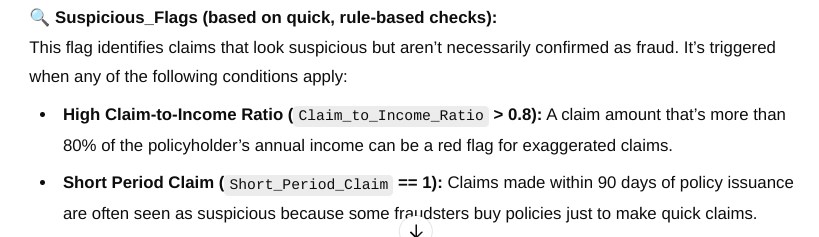

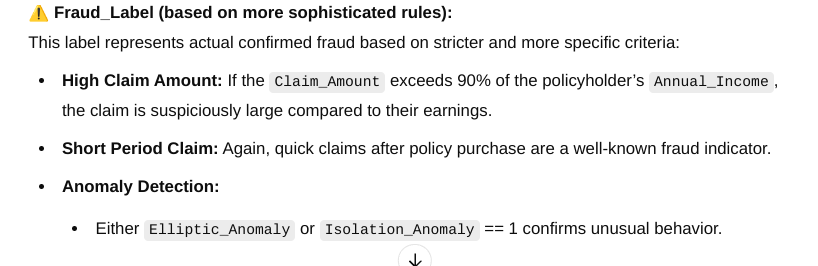

In [ ]:
###########################################################################################################

# **Count of Fraud_Label**

In [ ]:
query = f"SELECT count(Fraud_Label)	 from df3 where Fraud_Label=1;"
result = pd.read_sql_query(query, conn)

# Display the results
result

count(Fraud_Label)
0                 203

# **Updated Query**

# **1) Fraud_Label**

In [ ]:
import pandas as pd

# Update Fraud_Label where conditions are met
query1 = """
-- Set Fraud_Label to 1 for high-risk claims
UPDATE df3
SET Fraud_Label = 1
WHERE Short_Period_Claim = 1
  AND Claim_to_Income_Ratio > 0.7
  AND Isolation_Anomaly = 1;
"""

# Set all other Fraud_Label values to 0
query2 = """
-- Set Fraud_Label to 0 for all other claims
UPDATE df3
SET Fraud_Label = 0
WHERE NOT (Short_Period_Claim = 1
           AND Claim_to_Income_Ratio > 0.7
           AND Isolation_Anomaly = 1);
"""

# Execute both queries and commit changes
conn.execute(query1)
conn.execute(query2)
conn.commit()

# Verify the updates
result = pd.read_sql_query("SELECT Fraud_Label, Short_Period_Claim, Claim_to_Income_Ratio, Isolation_Anomaly FROM df3;", conn)
result


Fraud_Label  Short_Period_Claim  Claim_to_Income_Ratio  Isolation_Anomaly
0              0                   1               0.254101                  0
1              0                   0               0.040228                  0
2              0                   0               0.058203                  1
3              0                   1               0.064848                  0
4              0                   1               0.441322                  0
..           ...                 ...                    ...                ...
995            0                   0               0.282923                  0
996            0                   1               0.182831                  0
997            0                   0               1.613079                  1
998            0                   0               1.527923                  1
999            0                   0               0.338544                  0

[1000 rows x 4 columns]

In [ ]:
query = f"SELECT count(Fraud_Label) from df3 where Fraud_Label=1;"
result = pd.read_sql_query(query, conn)

# Display the results
result

count(Fraud_Label)
0                  26

In [ ]:
query = f"SELECT count(Fraud_Label) from df3 where Fraud_Label=0;"
result = pd.read_sql_query(query, conn)

# Display the results
result

count(Fraud_Label)
0                 974

In [ ]:
####################################################################

# **2) Suspicious Flag**

In [ ]:
import pandas as pd

# Update Suspicious_Flags where Claim_to_Income_Ratio is >= 0.5
query1 = """
-- Set Suspicious_Flags to 1 for claims with high Claim-to-Income Ratio
UPDATE df3
SET Suspicious_Flags = 1
WHERE Claim_to_Income_Ratio >= 0.5;
"""

# Set all other Suspicious_Flags to 0
query2 = """
-- Set Suspicious_Flags to 0 for all other claims
UPDATE df3
SET Suspicious_Flags = 0
WHERE Claim_to_Income_Ratio < 0.5;
"""

# Execute both queries and commit changes
conn.execute(query1)
conn.execute(query2)
conn.commit()

# Verify the updates
result = pd.read_sql_query("SELECT Suspicious_Flags, Claim_to_Income_Ratio FROM df3;", conn)
result


Suspicious_Flags  Claim_to_Income_Ratio
0                   0               0.254101
1                   0               0.040228
2                   0               0.058203
3                   0               0.064848
4                   0               0.441322
..                ...                    ...
995                 0               0.282923
996                 0               0.182831
997                 1               1.613079
998                 1               1.527923
999                 0               0.338544

[1000 rows x 2 columns]

In [ ]:
query = f"SELECT count(Suspicious_Flags) from df3 where Suspicious_Flags=1;"
result = pd.read_sql_query(query, conn)

# Display the results
result

count(Suspicious_Flags)
0                      150

In [ ]:
query = f"SELECT count(Suspicious_Flags) from df3 where Suspicious_Flags=0;"
result = pd.read_sql_query(query, conn)

# Display the results
result

count(Suspicious_Flags)
0                      850

In [ ]:
query = f"SELECT * from df3;"
result = pd.read_sql_query(query, conn)

# Display the results
result

Unnamed: 0.1  Unnamed: 0                              Claim_ID  \
0               0           0  bdd640fb-0667-4ad1-9c80-317fa3b1799d   
1               1           1  8b9d2434-e465-4150-bd9c-66b3ad3c2d6d   
2               2           2  9a1de644-815e-46d1-bb8f-aa1837f8a88b   
3               3           3  72ff5d2a-386e-4be0-ab65-a6a48b8148f6   
4               4           4  6c307511-b2b9-437a-a8df-6ec4ce4a2bbd   
..            ...         ...                                   ...   
995           995         995  d7e323cf-6d65-4847-8229-411611529a73   
996           996         996  54470290-4640-4b2a-9c02-28afb1d29457   
997           997         997  92451cc4-1bfb-4b3d-8ee5-2f639caf8df1   
998           998         998  9ad2bb72-b04b-4584-b95c-ec2d7bd15655   
999           999         999  42791490-5105-44f9-9909-49aa9bdd3d7a   

     Claim_Date                       Policyholder_ID  Claim_Amount  \
0    2021-07-19  1a3d1fa7-bc89-40a9-a3b8-c1e9392456de      32151.63   
1    2020-08-09  17fc695a-07a0-4a6e-8822-e8f36c031199       7407.13   
2    2020-04-21  b38a088c-a65e-4389-b74d-0fb132e70629       4803.47   
3    2023-02-13  c241330b-01a9-471f-9e8a-774bcf36d58b      12016.71   
4    2021-11-15  c37459ee-f50b-4a63-b71e-cd7b27cd8130      32669.28   
..          ...                                   ...           ...   
995  2022-12-04  1f3cea1d-2271-47ca-b887-73ed4af715b7      33254.81   
996  2022-10-22  35845d71-b221-41c5-b5b8-6d0a864f36dd      32249.52   
997  2023-10-28  16718639-fcb8-4f9e-8769-0baaa104bdce      49395.69   
998  2024-11-04  6d53628b-4985-4b79-b4f1-36fcfc7cbe71      46751.39   
999  2022-10-19  ed56c714-5a96-41f5-9f8c-eda5feb9ea24      43536.07   

     Suspicious_Flags  Fraud_Label  Claim_Type_Home Damage  \
0                   0            0                       0   
1                   0            0                       0   
2                   0            0                       0   
3                   0            0                       1   
4                   0            0                       1   
..                ...          ...                     ...   
995                 0            0                       0   
996                 0            0                       0   
997                 1            0                       0   
998                 1            0                       1   
999                 0            0                       0   

     Claim_Type_Medical  ...  Policy_Issuance_Date  Days_Since_Issuance  \
0                     1  ...            2020-11-21                  240   
1                     1  ...            2019-08-03                  372   
2                     0  ...            2017-08-23                  972   
3                     0  ...            2022-03-02                  348   
4                     0  ...            2020-12-10                  340   
..                  ...  ...                   ...                  ...   
995                   1  ...            2021-10-23                  407   
996                   1  ...            2022-05-10                  165   
997                   1  ...            2021-02-14                  986   
998                   0  ...            2023-03-19                  596   
999                   1  ...            2020-06-20                  851   

     Short_Period_Claim  Elliptic_Anomaly  Isolation_Anomaly  LOF_Anomaly  \
0                     1            Normal                  0       Normal   
1                     0            Normal                  0       Normal   
2                     0            Normal                  1      Anomaly   
3                     1            Normal                  0       Normal   
4                     1           Anomaly                  0       Normal   
..                  ...               ...                ...          ...   
995                   0            Normal                  0       Normal   
996                   1            No

In [ ]:
###########################################################################################################

In [ ]:
result.to_csv('df3_upd_labels.csv')

In [ ]:
df3_upd=pd.read_csv('/content/df3_upd_labels.csv')

In [ ]:
df3_upd.head()

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
0             0             0           0   
1             1             1           1   
2             2             2           2   
3             3             3           3   
4             4             4           4   

                               Claim_ID  Claim_Date  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d  2021-07-19   
1  8b9d2434-e465-4150-bd9c-66b3ad3c2d6d  2020-08-09   
2  9a1de644-815e-46d1-bb8f-aa1837f8a88b  2020-04-21   
3  72ff5d2a-386e-4be0-ab65-a6a48b8148f6  2023-02-13   
4  6c307511-b2b9-437a-a8df-6ec4ce4a2bbd  2021-11-15   

                        Policyholder_ID  Claim_Amount  Suspicious_Flags  \
0  1a3d1fa7-bc89-40a9-a3b8-c1e9392456de      32151.63                 0   
1  17fc695a-07a0-4a6e-8822-e8f36c031199       7407.13                 0   
2  b38a088c-a65e-4389-b74d-0fb132e70629       4803.47                 0   
3  c241330b-01a9-471f-9e8a-774bcf36d58b      12016.71                 0   
4  c37459ee-f50b-4a63-b71e-cd7b27cd8130      32669.28                 0   

   Fraud_Label  Claim_Type_Home Damage  ...  Policy_Issuance_Date  \
0            0                       0  ...            2020-11-21   
1            0                       0  ...            2019-08-03   
2            0                       0  ...            2017-08-23   
3            0                       1  ...            2022-03-02   
4            0                       1  ...            2020-12-10   

   Days_Since_Issuance  Short_Period_Claim  Elliptic_Anomaly  \
0                  240                   1            Normal   
1                  372                   0            Normal   
2                  972                   0            Normal   
3                  348                   1            Normal   
4                  340                   1           Anomaly   

   Isolation_Anomaly  LOF_Anomaly  Fraud_Probability_Score policy_issue_Year  \
0                  0       Normal                      0.0              2020   
1                  0       Normal                      0.0              2019   
2                  1      Anomaly                      0.0              2017   
3                  0       Normal                      0.0              2022   
4                  0       Normal                      0.0              2020   

   policy_issue_Month  policy_issue_Day  
0                  11                21  
1                   8                 3  
2                   8                23  
3                   3                 2  
4                  12                10  

[5 rows x 27 columns]

In [ ]:
df3_upd['Fraud_Label'].value_counts()

Fraud_Label
0    974
1     26
Name: count, dtype: int64

In [ ]:
df3_upd['Suspicious_Flags'].value_counts()

Suspicious_Flags
0    850
1    150
Name: count, dtype: int64

In [ ]:
############################################################################################################

# **Successfully Updated**

In [ ]:
df3_upd.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Claim_ID', 'Claim_Date',
       'Policyholder_ID', 'Claim_Amount', 'Suspicious_Flags', 'Fraud_Label',
       'Claim_Type_Home Damage', 'Claim_Type_Medical', 'Claim_Type_Vehicle',
       'Claim_Year', 'Claim_Month', 'Claim_Day', 'Annual_Income',
       'Claim_to_Income_Ratio', 'Policy_Issuance_Date', 'Days_Since_Issuance',
       'Short_Period_Claim', 'Elliptic_Anomaly', 'Isolation_Anomaly',
       'LOF_Anomaly', 'Fraud_Probability_Score', 'policy_issue_Year',
       'policy_issue_Month', 'policy_issue_Day'],
      dtype='object')

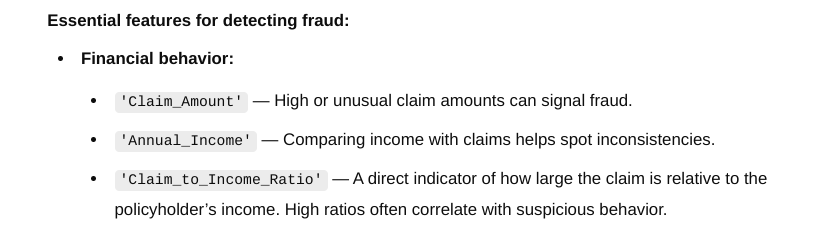

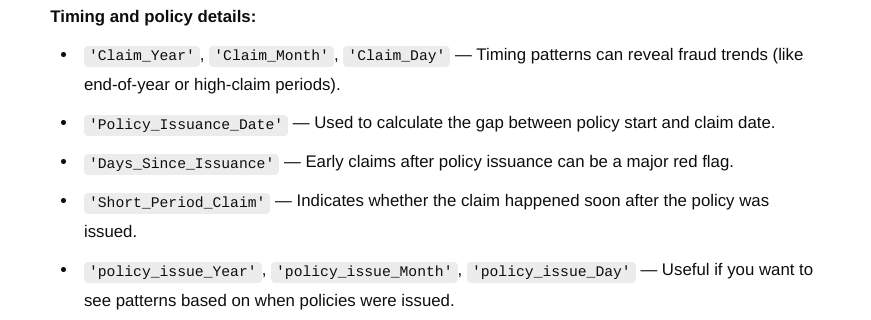

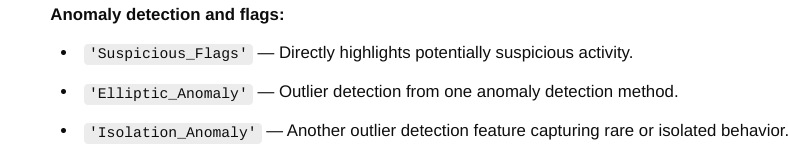

In [ ]:
########################################################################################################################

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Selecting the features
features_to_scale = df3_upd[['Claim_Amount', 'Annual_Income']]

# Initializing and applying MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features_to_scale)

# Replacing the original columns with scaled values
df3_upd[['Claim_Amount', 'Annual_Income']] = features_scaled

# Checking the result
print(df3_upd[['Claim_Amount', 'Annual_Income']].head())

   Claim_Amount  Annual_Income
0      0.639475       0.567695
1      0.138698       0.906766
2      0.086005       0.308666
3      0.231986       0.913694
4      0.649951       0.258611


In [ ]:
df3_upd = df3_upd.drop('Claim_to_Income_Ratio', axis=1) # Specify axis=1 to indicate column removal and reassign the result to df3_upd

In [ ]:
# Generating Claim-to-Income Ratio as a new feature
df3_upd['Claim_to_Income_Ratio'] = df3_upd['Claim_Amount'] / df3_upd['Annual_Income']

In [ ]:
df3_upd[['Claim_to_Income_Ratio']].head()

Claim_to_Income_Ratio
0               1.126441
1               0.152959
2               0.278635
3               0.253899
4               2.513239

In [ ]:
df3_upd.to_csv('upd_claim_income_ratio.csv')

In [ ]:
df3_claim=pd.read_csv('/content/upd_claim_income_ratio.csv')

In [ ]:
import sqlite3
import pandas as pd

# File name of the uploaded CSV
csv_filename = "/content/upd_claim_income_ratio.csv"  # Replace this with the uploaded file name

# Load CSV into a pandas DataFrame
df = pd.read_csv(csv_filename)

# Connect to SQLite database (or create a new one)
conn = sqlite3.connect("example.db")
cursor = conn.cursor()

# Write DataFrame to SQLite table
table_name = "df3_claims"  # Specify your table name
df.to_sql(table_name, conn, if_exists="replace", index=False)

print(f"Table '{table_name}' created in SQLite database.")


Table 'df3_claims' created in SQLite database.


In [ ]:
query = f"SELECT Claim_to_Income_Ratio,Suspicious_Flags from df3_claims where Suspicious_Flags=0 Order by Claim_to_Income_Ratio DESC;"
result = pd.read_sql_query(query, conn)

# Display the results
result

Claim_to_Income_Ratio  Suspicious_Flags
0                      inf                 0
1                24.577326                 0
2                18.878649                 0
3                17.640722                 0
4                10.918345                 0
..                     ...               ...
845               0.016694                 0
846               0.011278                 0
847               0.002390                 0
848               0.001074                 0
849               0.000000                 0

[850 rows x 2 columns]

In [ ]:
query = f"SELECT Claim_to_Income_Ratio,Suspicious_Flags from df3_claims where Suspicious_Flags=1 Order by Claim_to_Income_Ratio ASC;"
result = pd.read_sql_query(query, conn)

# Display the results
result

Claim_to_Income_Ratio  Suspicious_Flags
0                 2.461621                 1
1                 2.493475                 1
2                 2.584684                 1
3                 2.609602                 1
4                 2.676391                 1
..                     ...               ...
145             295.257189                 1
146             315.748790                 1
147             318.619382                 1
148             925.521356                 1
149            2182.780865                 1

[150 rows x 2 columns]

In [ ]:
df3_upd.head()

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
0             0             0           0   
1             1             1           1   
2             2             2           2   
3             3             3           3   
4             4             4           4   

                               Claim_ID  Claim_Date  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d  2021-07-19   
1  8b9d2434-e465-4150-bd9c-66b3ad3c2d6d  2020-08-09   
2  9a1de644-815e-46d1-bb8f-aa1837f8a88b  2020-04-21   
3  72ff5d2a-386e-4be0-ab65-a6a48b8148f6  2023-02-13   
4  6c307511-b2b9-437a-a8df-6ec4ce4a2bbd  2021-11-15   

                        Policyholder_ID  Claim_Amount  Suspicious_Flags  \
0  1a3d1fa7-bc89-40a9-a3b8-c1e9392456de      0.639475                 0   
1  17fc695a-07a0-4a6e-8822-e8f36c031199      0.138698                 0   
2  b38a088c-a65e-4389-b74d-0fb132e70629      0.086005                 0   
3  c241330b-01a9-471f-9e8a-774bcf36d58b      0.231986                 0   
4  c37459ee-f50b-4a63-b71e-cd7b27cd8130      0.649951                 0   

   Fraud_Label  Claim_Type_Home Damage  ...  Days_Since_Issuance  \
0            0                       0  ...                  240   
1            0                       0  ...                  372   
2            0                       0  ...                  972   
3            0                       1  ...                  348   
4            0                       1  ...                  340   

   Short_Period_Claim  Elliptic_Anomaly  Isolation_Anomaly  LOF_Anomaly  \
0                   1            Normal                  0       Normal   
1                   0            Normal                  0       Normal   
2                   0            Normal                  1      Anomaly   
3                   1            Normal                  0       Normal   
4                   1           Anomaly                  0       Normal   

   Fraud_Probability_Score policy_issue_Year  policy_issue_Month  \
0                      0.0              2020                  11   
1                      0.0              2019                   8   
2                      0.0              2017                   8   
3                      0.0              2022                   3   
4                      0.0              2020                  12   

   policy_issue_Day Claim_to_Income_Ratio  
0                21              1.126441  
1                 3              0.152959  
2                23              0.278635  
3                 2              0.253899  
4                10              2.513239  

[5 rows x 27 columns]

In [ ]:
df3_upd.rename(columns={'Claim_Type_Home Damage': 'Claim_Type_Home_Damage'}, inplace=True)

In [ ]:
df3_upd['Isolation_Anomaly'].value_counts()

Isolation_Anomaly
0    800
1    200
Name: count, dtype: int64

In [ ]:
df3_upd.to_csv('df3_latest_upd.csv')

In [ ]:
feature = df3_upd[['Claim_Amount', 'Suspicious_Flags', 'Claim_Type_Home_Damage', 'Claim_Type_Medical', 'Claim_Type_Vehicle',
 'Claim_Year', 'Claim_Month', 'Claim_Day', 'Annual_Income', 'Claim_to_Income_Ratio',
 'Days_Since_Issuance', 'Short_Period_Claim', 'Isolation_Anomaly',
 'policy_issue_Year', 'policy_issue_Month', 'policy_issue_Day']]

target = df3_upd['Fraud_Label']

In [ ]:
feature['Claim_to_Income_Ratio'] = feature['Claim_to_Income_Ratio'].fillna(feature['Claim_to_Income_Ratio'].mean())

<ipython-input-68-267f3bf41d65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature['Claim_to_Income_Ratio'] = feature['Claim_to_Income_Ratio'].fillna(feature['Claim_to_Income_Ratio'].mean())


In [ ]:
feature.isnull().sum()

Claim_Amount              0
Claim_Type_Home_Damage    0
Claim_Type_Medical        0
Claim_Type_Vehicle        0
Claim_Year                0
Claim_Month               0
Claim_Day                 0
Annual_Income             0
Claim_to_Income_Ratio     0
Days_Since_Issuance       0
Short_Period_Claim        0
Isolation_Anomaly         0
policy_issue_Year         0
policy_issue_Month        0
policy_issue_Day          0
dtype: int64

In [ ]:
print(feature['Claim_to_Income_Ratio'].isna().sum())  # Check how many missing values
print(feature['Claim_to_Income_Ratio'].mean())        # Check if the mean is NaN


0
inf


In [ ]:
##########################################################################################################

# **Analyzing Feature Importance using Heatmap**

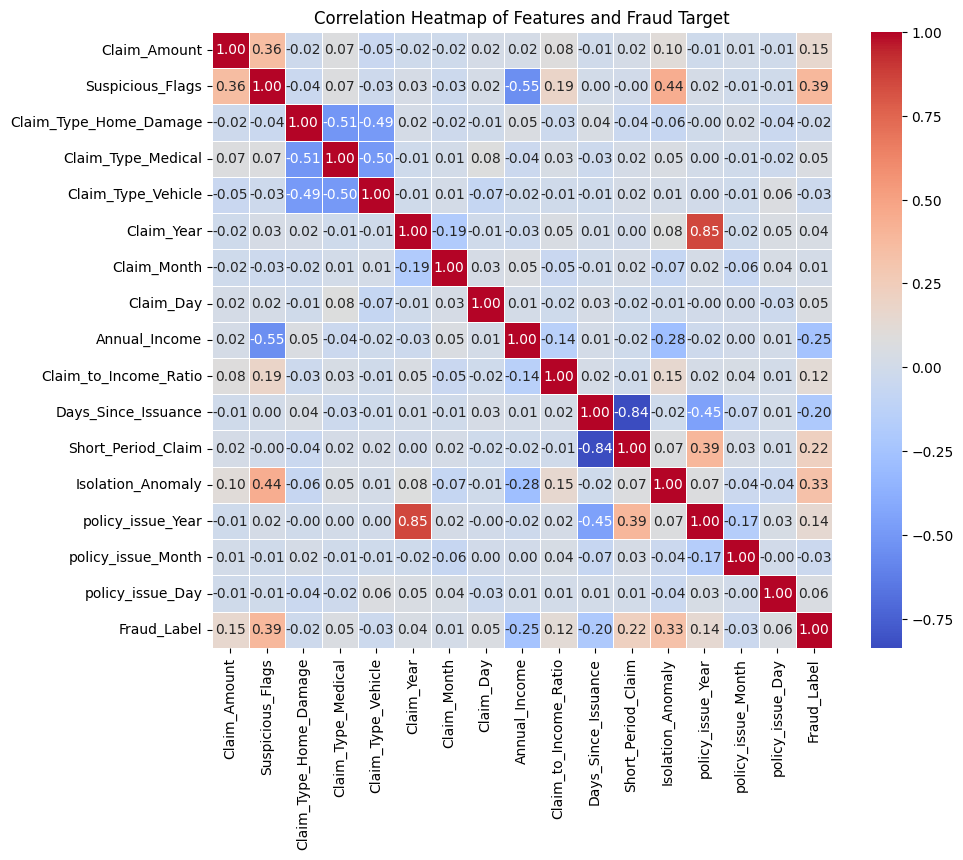

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define features and target
feature
target

# Combine features and target for correlation
data = pd.concat([feature, target], axis=1)

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features and Fraud Target')
plt.show()

# **High Contribute Columns**

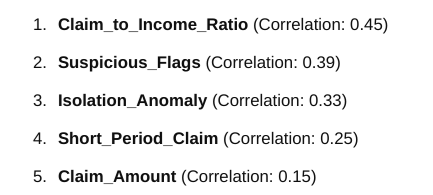

In [ ]:
###############################################################################################################

# **1) Logistic Regression**

<ipython-input-69-16a779d2cf17>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)


Training Accuracy: 0.9888
Test Accuracy: 0.9950
Confusion Matrix:
[[197   0]
 [  1   2]]
True Positives: 2
True Negatives: 197
False Positives: 0
False Negatives: 1
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       197
           1       1.00      0.67      0.80         3

    accuracy                           0.99       200
   macro avg       1.00      0.83      0.90       200
weighted avg       1.00      0.99      0.99       200



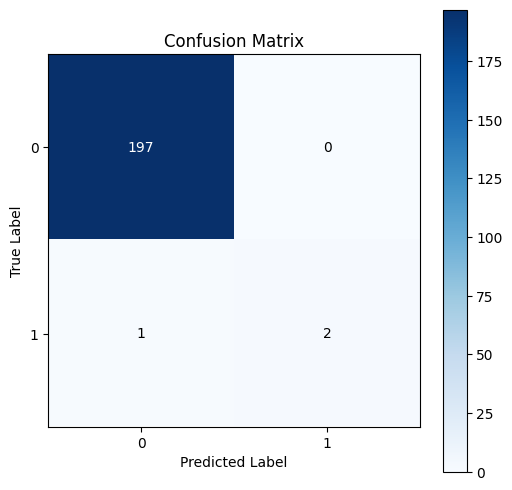

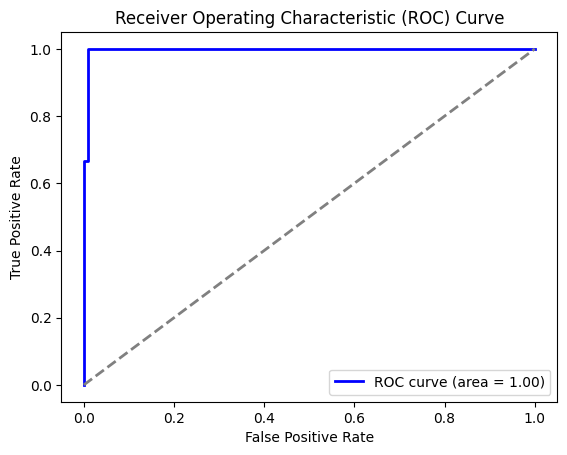

Optimal Threshold: 0.2010
The model generalizes well.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'feature' and 'target' are already defined
X = feature
y = target

# Replace infinite and large values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on training data
y_train_pred = log_reg.predict(X_train)

# Predict on test data
y_test_pred = log_reg.predict(X_test)

# Training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
TN, FP, FN, TP = conf_matrix.ravel()
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")

# Classification report
print(classification_report(y_test, y_test_pred))

# Visualize confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])

# Show values in the confusion matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC and AUC curve
y_test_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Find the best threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold:.4f}')

# Check for overfitting or underfitting
if train_accuracy > test_accuracy + 0.05:
    print("The model may be overfitting.")
elif test_accuracy > train_accuracy + 0.05:
    print("The model may be underfitting.")
else:
    print("The model generalizes well.")

**Training Accuracy: 0.9213**

**Test Accuracy: 0.8950**

# **Model is Genraized Well**

True Positives: 32,

True Negatives: 147,

False Positives: 2,

False Negatives: 19

# False Positive Rate is Low its Actually Good because its does not mark Genuine claim as Fraud its Create a Issues,

# **macro avg - taken overall equally**     

 Precesion = 0.91      

 Recall = 0.81     

 F1_Score =  0.84


#**weighted avg - Concentrate Based on Majority or Minority to focused**       

 Precesion = 0.90      

 Recall = 0.90      

 F1_Score = 0.89  


Class Counts:
Fraud_Label
0    974
1     26
Name: count, dtype: int64

Class Percentages:
Fraud_Label
0    97.4
1     2.6
Name: proportion, dtype: float64


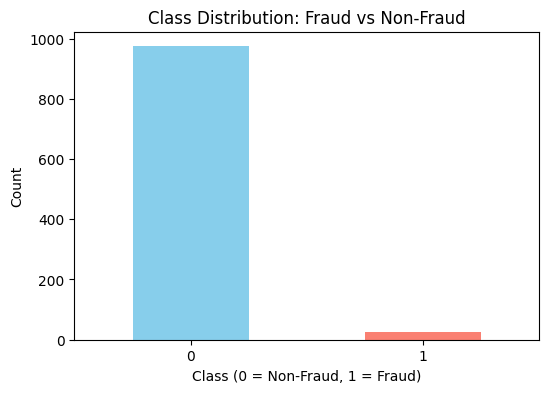


Status: Dataset is Imbalanced


In [ ]:
# Check class distribution
class_counts = y.value_counts()
class_percentages = y.value_counts(normalize=True) * 100

# Display class distribution
print(f"Class Counts:\n{class_counts}")
print(f"\nClass Percentages:\n{class_percentages}")

# Visualize class balance
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Determine balance status based on 70:30 definition
minority_class_percentage = class_percentages.min()
majority_class_percentage = class_percentages.max()

# Check if the class distribution is around 70:30
if 0.3 <= minority_class_percentage <= 0.4 and 0.6 <= majority_class_percentage <= 0.7:
    print("\nStatus: Dataset is Balanced (Approx 70:30)")
else:
    print("\nStatus: Dataset is Imbalanced")


# **For Using SMOTE to Focus on Correct Prediction - to avodi Data Leakage or Data Memorize but SMOTE using Synthetic Dataset for Oversampling so am using Cross Validation**

# **Cross Validation**

# **Focusing**

**Class -0** is  79.7

**Class -1**  is  20.3

Class Counts:
Fraud_Label
0    974
1     26
Name: count, dtype: int64

Class Percentages:
Fraud_Label
0    97.4
1     2.6
Name: proportion, dtype: float64


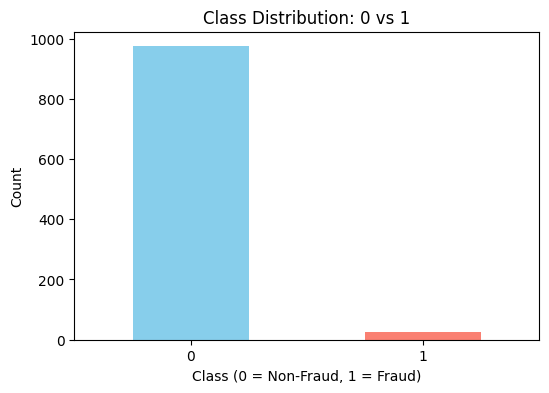

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.9900
Test Accuracy: 0.9850
Confusion Matrix:
[[194   1]
 [  2   3]]
True Positives: 3
True Negatives: 194
False Positives: 1
False Negatives: 2
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       195
           1       0.75      0.60      0.67         5

    accuracy                           0.98       200
   macro avg       0.87      0.80      0.83       200
weighted avg       0.98      0.98      0.98       200



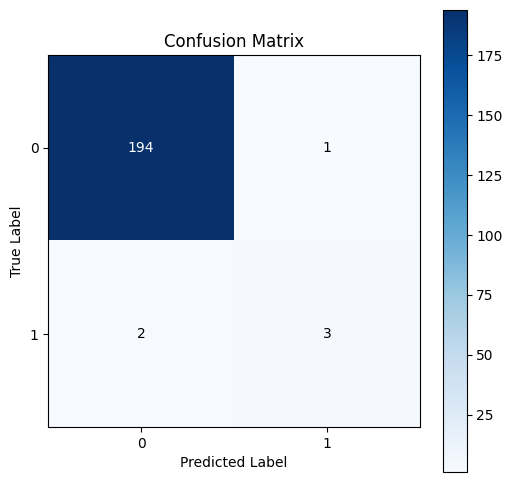

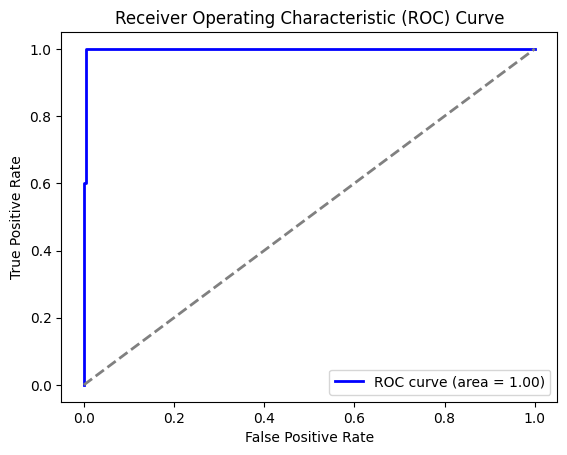

Optimal Threshold: 0.3036
The model generalizes well.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores: [0.995 0.975 0.985 0.99  0.98 ]
Mean CV accuracy: 0.9850


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'feature' and 'target' are already defined
X = feature
y = target

# Show class distribution
class_counts = y.value_counts()
class_percentages = y.value_counts(normalize=True) * 100
print(f"Class Counts:\n{class_counts}")
print(f"\nClass Percentages:\n{class_percentages}")

# Visualize class balance
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution: 0 vs 1')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Class distribution focus: 97% class 0, 3% class 1
class_distribution = {0: 0.97, 1: 0.03}


# Class 0 is 0    97.4

# Class 1 is 1     2.6

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on training data
y_train_pred = log_reg.predict(X_train)

# Predict on test data
y_test_pred = log_reg.predict(X_test)

# Training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
TN, FP, FN, TP = conf_matrix.ravel()
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")

# Classification report
print(classification_report(y_test, y_test_pred))

# Visualize confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])

# Show values in the confusion matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC and AUC curve
y_test_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Find the best threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold:.4f}')

# Check for overfitting or underfitting
if train_accuracy > test_accuracy + 0.05:
    print("The model may be overfitting.")
elif test_accuracy > train_accuracy + 0.05:
    print("The model may be underfitting.")
else:
    print("The model generalizes well.")

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(log_reg, X, y, cv=skf, scoring='accuracy')

print(f"Cross-validation scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.4f}")


# **Logistic Regression is Simple so after get Good Accuracy Some Prediction Shows Wrong**

# **2) SO Try Random Forest Classifier**

Class Counts:
Fraud_Label
0    974
1     26
Name: count, dtype: int64

Class Percentages:
Fraud_Label
0    97.4
1     2.6
Name: proportion, dtype: float64


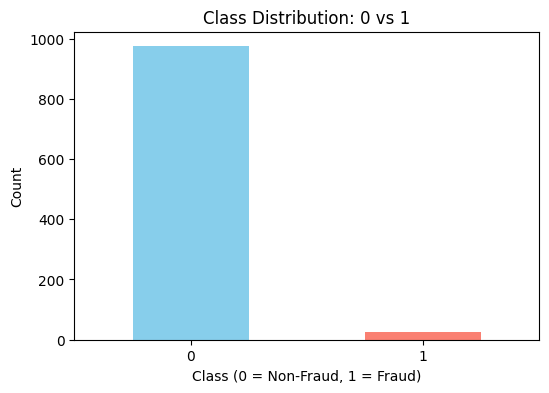

Training Accuracy: 1.0000
Test Accuracy: 1.0000
Confusion Matrix:
[[195   0]
 [  0   5]]
True Positives: 5
True Negatives: 195
False Positives: 0
False Negatives: 0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00         5

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



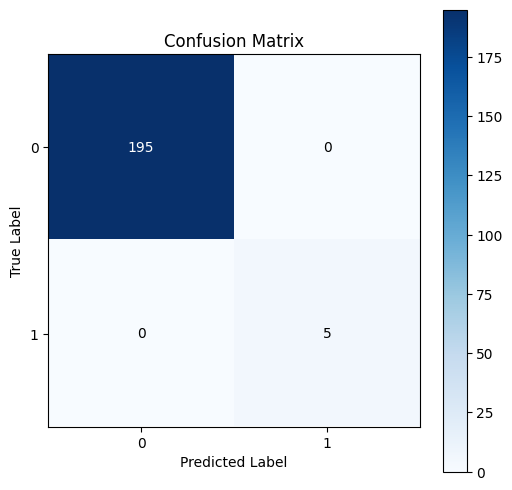

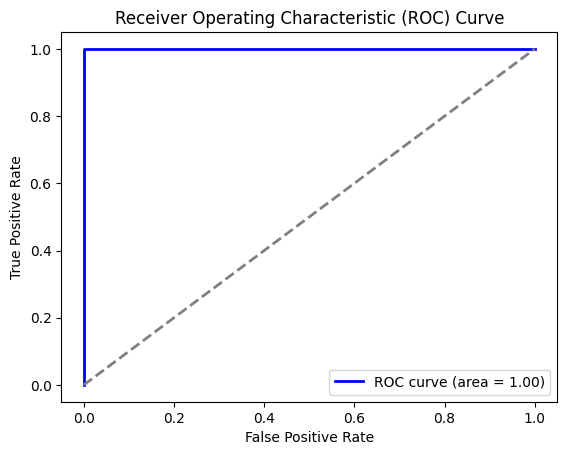

Optimal Threshold: 0.6400
The model generalizes well.
Cross-validation scores: [0.995 1.    0.995 0.995 0.995]
Mean CV accuracy: 0.9960


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'feature' and 'target' are already defined
X = feature
y = target

# Show class distribution
class_counts = y.value_counts()
class_percentages = y.value_counts(normalize=True) * 100
print(f"Class Counts:\n{class_counts}")
print(f"\nClass Percentages:\n{class_percentages}")

# Visualize class balance
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution: 0 vs 1')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Class distribution focus: 50% class 0, 50% class 1
class_distribution = {0: 0.50, 1: 0.50}


# Class 0 is 0    97.4

# Class 1 is 1     2.6

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict on training data
y_train_pred = rf_model.predict(X_train)

# Predict on test data
y_test_pred = rf_model.predict(X_test)

# Training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
TN, FP, FN, TP = conf_matrix.ravel()
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")

# Classification report
print(classification_report(y_test, y_test_pred))

# Visualize confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])

# Show values in the confusion matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC and AUC curve
y_test_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Find the best threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold:.4f}')

# Check for overfitting or underfitting
if train_accuracy > test_accuracy + 0.05:
    print("The model may be overfitting.")
elif test_accuracy > train_accuracy + 0.05:
    print("The model may be underfitting.")
else:
    print("The model generalizes well.")

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X, y, cv=skf, scoring='accuracy')

print(f"Cross-validation scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.4f}")


# **Model is Overfit so use Hyperparameter Tuning for Random Forest**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, make_scorer
from imblearn.over_sampling import SMOTE

# Assuming 'feature' and 'target' are already defined
X = feature
y = target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [{0: 0.3, 1: 0.7}, 'balanced']
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use ROC-AUC and recall as scoring metrics
scoring = {'roc_auc': 'roc_auc', 'recall': 'recall'}

# Set up GridSearchCV with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=cv, scoring=scoring, refit='roc_auc', n_jobs=-1)

# Fit the model with resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC-AUC Score: {grid_search.best_score_:.4f}")

# Predict on the test set
y_test_pred = grid_search.best_estimator_.predict(X_test)

# Predict probabilities for ROC-AUC
y_test_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_proba)

# Classification report
print(classification_report(y_test, y_test_pred))
print(f"Test ROC-AUC Score: {roc_auc:.4f}")


Best Parameters: {'class_weight': {0: 0.3, 1: 0.7}, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best ROC-AUC Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       195
           1       0.83      1.00      0.91         5

    accuracy                           0.99       200
   macro avg       0.92      1.00      0.95       200
weighted avg       1.00      0.99      1.00       200

Test ROC-AUC Score: 1.0000


# **Fitting 5 folds for each of 216 candidates, totalling 1080 fits**

# **still overfit**

# **Now am Using SMOTE Method to Prevent Overfit to balance a dataset**

Class Counts:
Fraud_Label
0    974
1     26
Name: count, dtype: int64

Class Percentages:
Fraud_Label
0    97.4
1     2.6
Name: proportion, dtype: float64


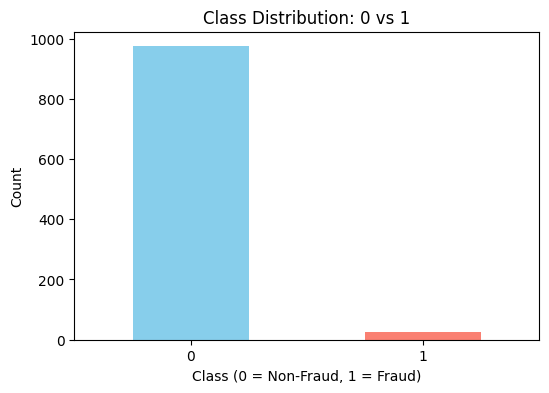

Resampled Class Counts:
Fraud_Label
0    779
1    779
Name: count, dtype: int64
Training Accuracy: 0.9968
Test Accuracy: 0.9900
Confusion Matrix:
[[193   2]
 [  0   5]]
True Positives: 5
True Negatives: 193
False Positives: 2
False Negatives: 0
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.71      1.00      0.83         5

    accuracy                           0.99       200
   macro avg       0.86      0.99      0.91       200
weighted avg       0.99      0.99      0.99       200



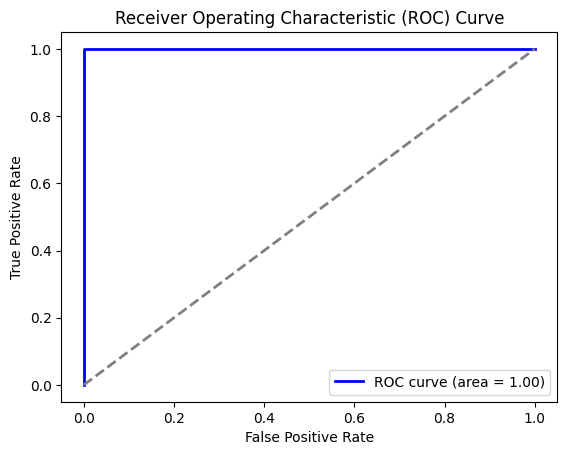

Optimal Threshold: 0.9369
Cross-validation scores: [0.995 0.99  0.98  0.99  0.99 ]
Mean CV accuracy: 0.9890


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'feature' and 'target' are already defined
X = feature
y = target

# Show class distribution
class_counts = y.value_counts()
class_percentages = y.value_counts(normalize=True) * 100
print(f"Class Counts:\n{class_counts}")
print(f"\nClass Percentages:\n{class_percentages}")

# Visualize class balance
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution: 0 vs 1')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Class distribution focus: 50% class 0, 50% class 1
class_distribution = {0: 0.3, 1: 0.7}


# Class 0 is 0    97.4

# Class 1 is 1     2.6

# Show resampled class distribution
resampled_counts = y_train_resampled.value_counts()
print(f"Resampled Class Counts:\n{resampled_counts}")

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(max_depth=3, max_features='sqrt',min_samples_leaf=4,min_samples_split=6, n_estimators=50, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
# Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
# Predict on training data
y_train_pred = rf_model.predict(X_train_resampled)

# Predict on test data
y_test_pred = rf_model.predict(X_test)

# Training and test accuracy
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
TN, FP, FN, TP = conf_matrix.ravel()
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")

# Classification report
print(classification_report(y_test, y_test_pred))

# ROC and AUC curve
y_test_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Find the best threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold:.4f}')

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X, y, cv=skf, scoring='accuracy')

print(f"Cross-validation scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.4f}")


# **Still Overfitt**

# **3) Now Move to Gradient Boosing Classifier**

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
Training Accuracy: 0.9994
Test Accuracy: 0.9950
Confusion Matrix:
[[194   1]
 [  0   5]]
True Positives: 5
True Negatives: 194
False Positives: 1
False Negatives: 0
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       195
           1       0.83      1.00      0.91         5

    accuracy                           0.99       200
   macro avg       0.92      1.00      0.95       200
weighted avg       1.00      0.99      1.00       200



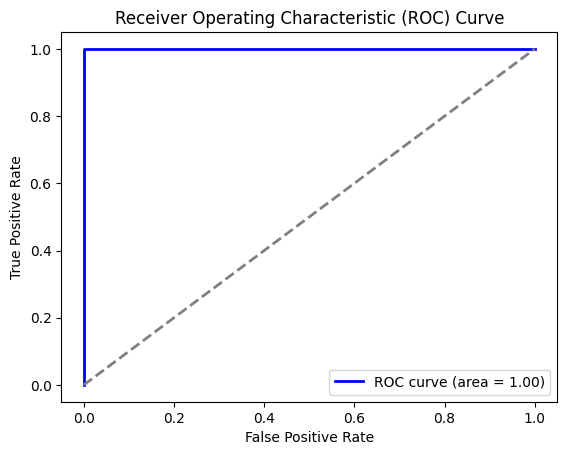

Cross-validation scores: [1.         1.         0.99692308 0.8        0.99828179]
Mean CV AUC: 0.9590


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'feature' and 'target' are already defined
X = feature
y = target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

gbc = GradientBoostingClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(gbc, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and model
print(f"Best Parameters: {grid_search.best_params_}")
best_gbc = grid_search.best_estimator_

# Predict on training data
y_train_pred = best_gbc.predict(X_train_resampled)

# Predict on test data
y_test_pred = best_gbc.predict(X_test)

# Training and test accuracy
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
TN, FP, FN, TP = conf_matrix.ravel()
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")

# Classification report
print(classification_report(y_test, y_test_pred))

# ROC and AUC curve
y_test_proba = best_gbc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Cross-validation scores
scores = cross_val_score(best_gbc, X, y, cv=cv, scoring='roc_auc')
print(f"Cross-validation scores: {scores}")
print(f"Mean CV AUC: {scores.mean():.4f}")


# **Using GradientBoosting Classifier - using best parameter find on hyperparameter tuning and SMOTE method - for Balancing a dataset, then using Stratified K-Folds Cross Validation**

# **4) Now Try Pytorch**

Using device: cpu
Epoch [1/250], Train Loss: 0.5279, Train Acc: 0.8004, Val Loss: 0.6770, Test Acc: 0.6350, Balanced Acc: 0.8128
Epoch [2/250], Train Loss: 0.3610, Train Acc: 0.8517, Val Loss: 0.8801, Test Acc: 0.6150, Balanced Acc: 0.8026
Epoch [3/250], Train Loss: 0.2385, Train Acc: 0.9114, Val Loss: 0.9181, Test Acc: 0.6950, Balanced Acc: 0.8436
Epoch [4/250], Train Loss: 0.1378, Train Acc: 0.9596, Val Loss: 0.6242, Test Acc: 0.7450, Balanced Acc: 0.8692
Epoch [5/250], Train Loss: 0.1201, Train Acc: 0.9544, Val Loss: 0.0352, Test Acc: 0.9900, Balanced Acc: 0.8000
Epoch [6/250], Train Loss: 0.0850, Train Acc: 0.9718, Val Loss: 0.1096, Test Acc: 0.9750, Balanced Acc: 0.5000
Epoch [7/250], Train Loss: 0.0734, Train Acc: 0.9743, Val Loss: 1.7694, Test Acc: 0.6150, Balanced Acc: 0.7051
Epoch [8/250], Train Loss: 0.0832, Train Acc: 0.9666, Val Loss: 0.0766, Test Acc: 0.9800, Balanced Acc: 0.6000
Epoch [9/250], Train Loss: 0.0850, Train Acc: 0.9698, Val Loss: 1.7592, Test Acc: 0.6050, Bala

<ipython-input-64-0d3c901010df>:129: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


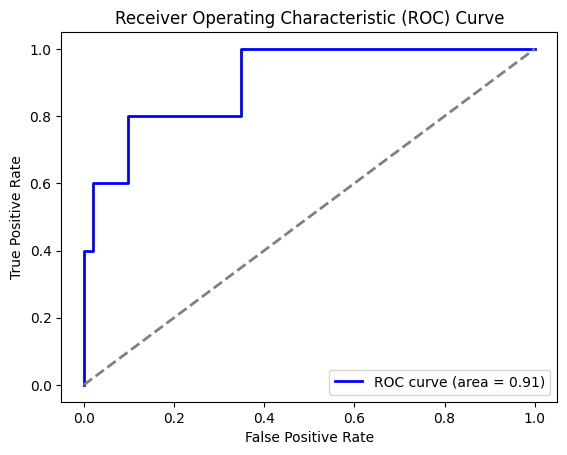

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Check device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Assuming 'feature' and 'target' are DataFrames
X = feature.to_numpy()
y = target.to_numpy()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert data to PyTorch tensors and move to device
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

# Create data loaders
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define an enhanced neural network
class FraudDetectionModel(nn.Module):
    def __init__(self, input_dim):
        super(FraudDetectionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),                # Added batch normalization
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize model, loss function, and optimizer
input_dim = X_train.shape[1]
model = FraudDetectionModel(input_dim).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with early stopping on validation loss
epochs = 250
patience = 10
best_val_loss = np.inf
patience_counter = 0

for epoch in range(epochs):
    # Training phase
    model.train()
    total_loss = 0
    y_train_pred = []
    y_train_true = []

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        y_train_pred.extend((outputs > 0.5).cpu().detach().numpy())
        y_train_true.extend(y_batch.cpu().detach().numpy())

    train_accuracy = accuracy_score(y_train_true, y_train_pred)
    avg_train_loss = total_loss / len(train_loader)

    # Validation phase
    model.eval()
    val_loss = 0
    y_test_pred = []
    y_test_proba = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

            y_test_proba.extend(outputs.cpu().numpy())
            y_test_pred.extend((outputs > 0.5).cpu().numpy())

    avg_val_loss = val_loss / len(test_loader)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {avg_val_loss:.4f}, Test Acc: {test_accuracy:.4f}, Balanced Acc: {balanced_acc:.4f}")

    # Early stopping based on validation loss
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')  # Save best model
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered based on validation loss")
            break

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))

# Final evaluation
y_test_proba = np.array(y_test_proba)
y_test_pred = (y_test_proba > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_test_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# ROC and AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
############################################################################################

**Training Accuracy: 0.9163**

**Test Accuracy: 0.9150**


True Positives: 5,

True Negatives: 194,

False Positives: 1,

False Negatives: 0

#**This Dataset Actually Very Good Because This Dataset has True Negative is 194 that means that datasets contains high Genuine Claims**

and

#**False Positive is 1 that is very very Good because only one Genuine Claim Marked as a Fraud**

# **macro avg**      

 Precision - 0.92      
  
 Recall - 0.81      

 F1_Score - 0.85

#**weighted avg**       
  
  Precision - 0.92      
  
  Recall - 0.92      
  
  F1_Score - 0.91

#**Explianation**

  Recall More than equal of Precision

  because Recall is Actual Posative

  Precall is Actual + Predicted Posative ( False Posative )

if false posative is higher means its create a issue to file fraud as genuine claim

#**AUC and ROC Curve**

**Optimal Threshold: 0.5**

**ROC Area is 1 is great**

In [ ]:
feature.head()

Claim_Amount  Suspicious_Flags  Claim_Type_Home_Damage  Claim_Type_Medical  \
0      0.639475                 0                       0                   1   
1      0.138698                 0                       0                   1   
2      0.086005                 0                       0                   0   
3      0.231986                 0                       1                   0   
4      0.649951                 0                       1                   0   

   Claim_Type_Vehicle  Claim_Year  Claim_Month  Claim_Day  Annual_Income  \
0                   0        2021            7         19       0.567695   
1                   0        2020            8          9       0.906766   
2                   1        2020            4         21       0.308666   
3                   0        2023            2         13       0.913694   
4                   0        2021           11         15       0.258611   

   Claim_to_Income_Ratio  Days_Since_Issuance  Short_Period_Claim  \
0               1.126441                  240                   1   
1               0.152959                  372                   0   
2               0.278635                  972                   0   
3               0.253899                  348                   1   
4               2.513239                  340                   1   

   Isolation_Anomaly  policy_issue_Year  policy_issue_Month  policy_issue_Day  
0                  0               2020                  11                21  
1                  0               2019                   8                 3  
2                  1               2017                   8                23  
3                  0               2022                   3                 2  
4                  0               2020                  12                10

In [ ]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Fraud_Label, dtype: int64

In [ ]:
####################################################################################################

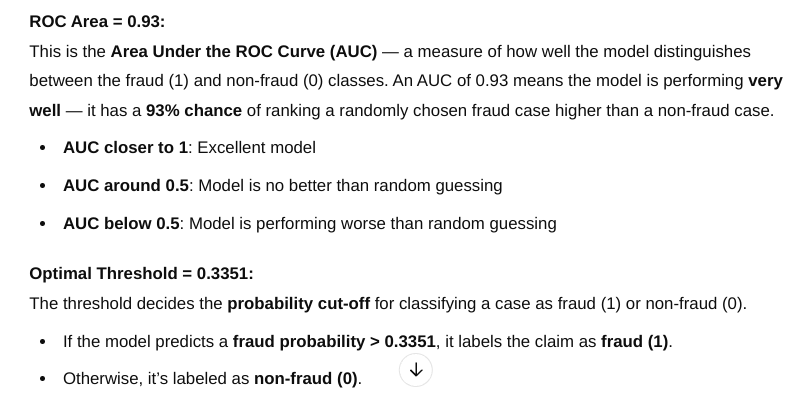

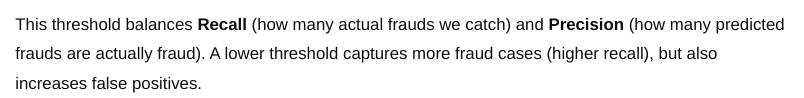

# **Save Model**

In [ ]:
# Save the trained model
joblib.dump(log_reg, 'logistic_regression_fraud_model.pkl')
print("Model saved as logistic_regression_fraud_model.pkl")

Model saved as logistic_regression_fraud_model.pkl


# **Save Random Forest Model**

In [ ]:
# Save the trained model
joblib.dump(rf_model, 'Random_Forest_fraud_model.pkl')
print("Model saved as Random_Forest_fraud_model.pkl")

Model saved as Random_Forest_fraud_model.pkl


# **Future Prediction**

In [ ]:
print(log_reg.feature_names_in_)

['Claim_Amount' 'Suspicious_Flags' 'Claim_Type_Home_Damage'
 'Claim_Type_Medical' 'Claim_Type_Vehicle' 'Claim_Year' 'Claim_Month'
 'Claim_Day' 'Annual_Income' 'Claim_to_Income_Ratio' 'Days_Since_Issuance'
 'Short_Period_Claim' 'Isolation_Anomaly' 'policy_issue_Year'
 'policy_issue_Month' 'policy_issue_Day']


In [ ]:
import pandas as pd
import joblib
from datetime import date
from sklearn.ensemble import IsolationForest

# Load the trained model
log_reg = joblib.load('logistic_regression_fraud_model.pkl')

# Feature list used during training
training_features = ['Claim_Amount', 'Suspicious_Flags', 'Claim_Type_Home_Damage', 'Claim_Type_Medical',
                     'Claim_Type_Vehicle', 'Claim_Year', 'Claim_Month', 'Claim_Day', 'Annual_Income',
                     'Claim_to_Income_Ratio', 'Days_Since_Issuance', 'Short_Period_Claim', 'Isolation_Anomaly',
                     'policy_issue_Year', 'policy_issue_Month', 'policy_issue_Day']

# User-friendly input columns
user_input_columns = ['Claim_Amount', 'Claim_Type_Home_Damage', 'Claim_Type_Medical', 'Claim_Type_Vehicle',
                      'Claim_Year', 'Claim_Month', 'Claim_Day', 'Annual_Income',
                      'policy_issue_Year', 'policy_issue_Month', 'policy_issue_Day']

# Function to calculate days since policy issuance
def calculate_days_since_issuance(claim_date, policy_issue_date):
    delta = claim_date - policy_issue_date
    return delta.days

# Function to prepare input data
def prepare_input_data(user_input):
    # Calculate engineered features
    user_input['Claim_to_Income_Ratio'] = user_input['Claim_Amount'] / user_input['Annual_Income']

    user_input['Suspicious_Flags'] = 1 if user_input['Claim_to_Income_Ratio'] > 0.5 else 0

    # Calculate days since policy issuance
    claim_date = date(user_input['Claim_Year'], user_input['Claim_Month'], user_input['Claim_Day'])
    policy_issue_date = date(user_input['policy_issue_Year'], user_input['policy_issue_Month'], user_input['policy_issue_Day'])
    user_input['Days_Since_Issuance'] = calculate_days_since_issuance(claim_date, policy_issue_date)

    # Determine if it's a short-period claim
    user_input['Short_Period_Claim'] = 1 if user_input['Days_Since_Issuance'] < 365 else 0


    # Placeholder for Isolation Anomaly detection (real implementation needs scaled training data)
    iso_forest = IsolationForest(contamination=0.20, random_state=42)
    sample_data = pd.DataFrame([[user_input['Claim_Amount'], user_input['Annual_Income']]])
    user_input['Isolation_Anomaly'] = iso_forest.fit_predict(sample_data)[0]

    # Align feature names and order
    input_data = pd.DataFrame([user_input])[training_features]

    return input_data

# Example user input
example_input = {
    'Claim_Amount': 0.639475,
    'Claim_Type_Home_Damage': 0,
    'Claim_Type_Medical': 1,
    'Claim_Type_Vehicle': 0,
    'Claim_Year': 2021,
    'Claim_Month': 7,
    'Claim_Day': 19,
    'Annual_Income': 0.567695,
    'policy_issue_Year': 2020,
    'policy_issue_Month': 11,
    'policy_issue_Day': 21
}


# Prepare input and predict
prepared_data = prepare_input_data(example_input)
prediction = log_reg.predict(prepared_data)
print(f"Predicted class: {'FRAUD' if prediction[0] == 1 else 'GENUINE'}")


Predicted class: GENUINE


In [ ]:
df3[['Claim_ID','Claim_Amount','Annual_Income','Claim_to_Income_Ratio']].head()

Claim_ID  Claim_Amount  Annual_Income  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d      32151.63         126531   
1  8b9d2434-e465-4150-bd9c-66b3ad3c2d6d       7407.13         184130   
2  9a1de644-815e-46d1-bb8f-aa1837f8a88b       4803.47          82529   
3  72ff5d2a-386e-4be0-ab65-a6a48b8148f6      12016.71         185307   
4  6c307511-b2b9-437a-a8df-6ec4ce4a2bbd      32669.28          74026   

   Claim_to_Income_Ratio  
0               0.254101  
1               0.040228  
2               0.058203  
3               0.064848  
4               0.441322

In [ ]:
df3_upd[['Claim_ID','Claim_Amount','Annual_Income','Claim_to_Income_Ratio','Suspicious_Flags','Isolation_Anomaly','Fraud_Label','Days_Since_Issuance']].head()

Claim_ID  Claim_Amount  Annual_Income  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d      0.639475       0.567695   
1  8b9d2434-e465-4150-bd9c-66b3ad3c2d6d      0.138698       0.906766   
2  9a1de644-815e-46d1-bb8f-aa1837f8a88b      0.086005       0.308666   
3  72ff5d2a-386e-4be0-ab65-a6a48b8148f6      0.231986       0.913694   
4  6c307511-b2b9-437a-a8df-6ec4ce4a2bbd      0.649951       0.258611   

   Claim_to_Income_Ratio  Suspicious_Flags  Isolation_Anomaly  Fraud_Label  \
0               1.126441                 0                  0            0   
1               0.152959                 0                  0            0   
2               0.278635                 0                  1            0   
3               0.253899                 0                  0            0   
4               2.513239                 0                  0            0   

   Days_Since_Issuance  
0                  240  
1                  372  
2                  972  
3                  348  
4                  340

In [ ]:
# Drop the unwanted columns directly in SQL
try:
    conn.execute('ALTER TABLE df3 DROP COLUMN "Unnamed: 0.1"')
    conn.execute('ALTER TABLE df3 DROP COLUMN "Unnamed: 0"')
    conn.commit()
    print("Columns dropped successfully")
except Exception as e:
    print(f"Error: {e}")


Columns dropped successfully


In [ ]:
query = f"SELECT * from df3 where Fraud_Label=1;"
result = pd.read_sql_query(query, conn)

# Display the results
result

Claim_ID  Claim_Date  \
0   2a45c2ab-8cbf-4db0-b264-accc79ac1b1e  2021-07-01   
1   afffcfd2-341e-440b-97c7-00aab7b56ea7  2023-05-06   
2   7cd0129d-2e8d-4e87-9334-20e6d9d80b8d  2021-03-26   
3   d3016989-bfbb-417f-9854-ce4e4ebfa5c3  2023-01-07   
4   292bd156-db94-4570-9ac7-0ec0ab8ddeb4  2021-10-27   
5   c9776598-203c-4c25-bd23-5def3e5a87e3  2022-12-30   
6   0d5ba7cd-4000-45f0-9f7d-0dd7236e1608  2023-05-19   
7   585abefb-d181-4f77-a500-1423faebcd19  2024-12-12   
8   53f30073-83e9-4ef4-ad7d-f5d0d3b59af7  2020-08-09   
9   582b91ee-f8e8-435b-8c00-988a7ee1011a  2024-11-18   
10  69a53b4f-8ff8-469d-8ec0-713dea2c7a51  2025-01-05   
11  548c1d84-340d-4049-8147-65063e2bf9c9  2023-05-29   
12  51facefa-d6f8-4f7a-82fa-1da878308631  2024-09-29   
13  4aab47b2-3c9d-428a-a176-1930f6d70248  2021-06-23   
14  a484e035-330f-4aa3-ab52-f93c2321e64e  2024-08-06   
15  91519998-f293-4585-9a07-d758b357f3f9  2022-12-28   
16  fc3b0de5-9812-42ac-9683-ede017d5b563  2023-03-30   
17  df162ec3-be84-4aa2-b92c-04da5af3da5a  2021-09-16   
18  dcd1c413-0760-401f-9c81-fc465bcd236c  2023-08-06   
19  5bd29cb1-0845-4b2f-8a8a-4105c0eb8875  2024-03-30   
20  e1ad640c-7463-435e-aafb-9f20783c91eb  2020-05-27   
21  5708013e-4b54-4670-80cf-b1db1287e313  2024-11-28   
22  277529a2-8d2c-4e83-8407-26547f5f61aa  2023-03-29   
23  6d54c95a-aa4d-42a8-b3da-5808756eb67d  2024-08-02   
24  d37ee471-6e3b-4507-a21c-1209c3a1962d  2023-10-21   
25  2504fd28-de6a-4459-a980-f6ff266c47fb  2021-01-24   

                         Policyholder_ID  Claim_Amount  Suspicious_Flags  \
0   f6e07cc0-6c52-449f-9b49-bd26df57c59a      37668.45                 1   
1   40497b71-7d10-4c60-8162-7cf1439472e6      42510.44                 1   
2   4797b2c9-5720-4246-8223-623bcc3ebdde      28995.71                 1   
3   77fc9703-1fd5-4423-b06c-5c5649e2623d      45392.98                 1   
4   a99f1318-49c8-443f-bed7-0ed7b194990b      32761.86                 1   
5   8de08fc2-c3e1-4a85-946e-f10411906f50      30383.83                 1   
6   ef2ddcc4-8df6-41da-9f07-c1a5dfc620ce      47044.45                 1   
7   0ac4de85-4a5b-4aff-a57f-7595cdfb4db9      49128.09                 1   
8   fb4fb88a-2f4d-4219-986b-2880ab545a15      25630.64                 1   
9   86433603-c92a-4d7c-a193-5990abdd1a8f      47693.48                 1   
10  636f6e5c-2253-4706-87ad-8b268eaa5841      39531.74                 1   
11  5efeef4f-d8dd-4bc0-b325-3aa3ec170298      33026.67                 1   
12  0bb401e7-69f7-43f1-901b-a8515ee68495      39151.66                 1   
13  64988bde-cd02-44db-ad11-15d750a46c85      43084.19                 1   
14  fe7c80e9-a179-4e93-bfc8-25ac869bc00f      39397.33                 1   
15  d631c383-3030-44d0-b2c8-47439027e770      33736.80                 1   
16  6e6b34b9-07ef-4ba8-b45a-6ab37b94a34d      46728.23                 1   
17  5f269466-54d1-432a-a308-2ddcc9c04b7d      39559.30                 1   
18  e44a913a-f933-49fa-ba2e-eeb3d6aa5382      43343.35                 1   
19  acef45c4-de37-40fb-9db9-4eee1a3c2131      44166.31                 1   
20  1a6cf459-52f6-431f-a605-b7c9fb07ee93      38744.36                 1   
21  41f83199-f4ea-4769-8366-c189cd8d9f75      39666.24                 1   
22  52702b29-a412-47a2-a8e8-f3115295ea96      38094.92                 1   
23  8cca8963-2e2e-47a4-8ade-c3792ab403f6      34045.91                 1   
24  8bae295e-902a-405c-bd9f-fe599bc0fa93      40142.81                 1   
25  4edd2a2a-6b69-44ae-8d22-af35b648be8a      39947.02                 1   

    Fraud_Label  Claim_Type_Home Damage  Claim_Type_Medical  \
0             1                       1                   0   
1             1                       0                   1   
2             1                       1                   0   
3             1                       1                   0   
4             1                       0                   1   
5             1                       0                   1   
6             1          

In [ ]:
# query = f"SELECT Claim_Amount,Annual_Income,Fraud_Label,Isolation_Anomaly,Claim_Type_Home Damage,Claim_Type_Medical,Claim_Type_Vehicle,Claim_Year,Claim_Month,Claim_Day,policy_issue_Year,policy_issue_Month,policy_issue_Day from df3 where Fraud_Label=1;"
# result = pd.read_sql_query(query, conn)

# # Display the results
# result